In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [31]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [32]:
# function to download all listings data
def get_listings_antwerp_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('Antwerp')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/antwerp_{date}.csv',index=False)
get_listings_antwerp_timeseries()

In [33]:
# pull in detailed_listings
raw_df_antwerp = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_antwerp)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(antwerp_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 1750 AirBnb listings.


In [34]:
antwerp_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2020-12.csv')
antwerp_raw_df_12_12_2020.shape





(1751, 16)

In [35]:
# use magic commands 'cd' to change directory
# use glob to locate all files for antwerp
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_antwerp = glob.glob('antwerp/**.csv')
files_antwerp

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['antwerp/Antwerp_2021-01.csv',
 'antwerp/Antwerp_2021-02.csv',
 'antwerp/Antwerp_2021-03.csv',
 'antwerp/Antwerp_2021-07.csv',
 'antwerp/Antwerp_2021-06.csv',
 'antwerp/Antwerp_2021-04.csv',
 'antwerp/Antwerp_2021-10.csv',
 'antwerp/Antwerp_2021-08.csv',
 'antwerp/Antwerp_2021-09.csv',
 'antwerp/Antwerp_2020-11.csv',
 'antwerp/Antwerp_2020-12.csv']

In [36]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

antwerp_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(antwerp_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(antwerp_raw_df_12_12_2020['price'].mean(),2)}.")

antwerp_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(antwerp_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_1_9_2021['price'].mean(),2)}.")

antwerp_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(antwerp_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_2_8_2021['price'].mean(),2)}.")

antwerp_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(antwerp_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_3_4_2021['price'].mean(),2)}.")

antwerp_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(antwerp_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_4_9_2021['price'].mean(),2)}.")

#antwerp_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(antwerp_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_5_19_2021['price'].mean(),2)}.")

antwerp_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(antwerp_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_6_3_2021['price'].mean(),2)}.")

antwerp_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(antwerp_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_7_4_2021['price'].mean(),2)}.")

antwerp_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(antwerp_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_8_6_2021['price'].mean(),2)}.")

antwerp_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(antwerp_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_9_7_2021['price'].mean(),2)}.")

antwerp_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(antwerp_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_10_6_2021['price'].mean(),2)}.")

#antwerp_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(antwerp_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 1751 AirBnb listings; the avg price is €94.93.
The 1_9_2021 dataset contains 1717 AirBnb listings; the avg price is €91.93.
The 2_8_2021 dataset contains 1716 AirBnb listings; the avg price is €91.52.
The 3_4_2021 dataset contains 1749 AirBnb listings; the avg price is €96.45.
The 4_9_2021 dataset contains 1739 AirBnb listings; the avg price is €99.19.
The 6_3_2021 dataset contains 1810 AirBnb listings; the avg price is €99.63.
The 7_4_2021 dataset contains 1843 AirBnb listings; the avg price is €100.1.
The 8_6_2021 dataset contains 1792 AirBnb listings; the avg price is €100.99.
The 9_7_2021 dataset contains 1776 AirBnb listings; the avg price is €103.83.
The 10_6_2021 dataset contains 1750 AirBnb listings; the avg price is €106.99.


In [37]:
df_list_antwerp = [antwerp_raw_df_12_12_2020, antwerp_raw_df_1_9_2021, antwerp_raw_df_2_8_2021,
           antwerp_raw_df_3_4_2021, antwerp_raw_df_4_9_2021, antwerp_raw_df_6_3_2021, antwerp_raw_df_7_4_2021,
           antwerp_raw_df_8_6_2021, antwerp_raw_df_9_7_2021, antwerp_raw_df_10_6_2021]

dates_antwerp = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_antwerp = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_antwerp = []

def airbnb_parse_antwerp(df_list, files):
    for file in files_antwerp:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/antwerp/antwerp_{file}.csv")
        print(f"The {file} antwerp dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_antwerp(df_list, dates):
    for file in files_antwerp:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/antwerp/antwerp_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_antwerp.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_antwerp)

antwerp_parse = airbnb_parse_antwerp(df_list_antwerp, files_antwerp)


The 2020-12 antwerp dataset contains 1751 AirBnb listings -- the avg price is €94.93.
The 2021-01 antwerp dataset contains 1717 AirBnb listings -- the avg price is €91.93.
The 2021-02 antwerp dataset contains 1716 AirBnb listings -- the avg price is €91.52.
The 2021-03 antwerp dataset contains 1749 AirBnb listings -- the avg price is €96.45.
The 2021-04 antwerp dataset contains 1739 AirBnb listings -- the avg price is €99.19.
The 2021-06 antwerp dataset contains 1810 AirBnb listings -- the avg price is €99.63.
The 2021-07 antwerp dataset contains 1843 AirBnb listings -- the avg price is €100.1.
The 2021-08 antwerp dataset contains 1792 AirBnb listings -- the avg price is €100.99.
The 2021-09 antwerp dataset contains 1776 AirBnb listings -- the avg price is €103.83.
The 2021-10 antwerp dataset contains 1750 AirBnb listings -- the avg price is €106.99.


In [38]:
antwerp_summary = airbnb_to_frame_antwerp(df_list_antwerp, files_antwerp)
antwerp_summary['Date of scrape'] = pd.to_datetime(antwerp_summary['Date of scrape'])
antwerp_summary['City'] = 'Antwerp'
antwerp_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,1751,94.93,71.0,12,3200,1.29,Antwerp
1,2021-01-01,1717,91.93,68.0,12,3200,1.27,Antwerp
2,2021-02-01,1716,91.52,68.0,8,3200,1.27,Antwerp
3,2021-03-01,1749,96.45,70.0,12,3200,1.24,Antwerp
4,2021-04-01,1739,99.19,70.0,10,5800,1.23,Antwerp
5,2021-06-01,1810,99.63,71.0,12,5800,1.32,Antwerp
6,2021-07-01,1843,100.10,75.0,12,5800,1.37,Antwerp
7,2021-08-01,1792,100.99,75.0,12,5800,1.58,Antwerp
8,2021-09-01,1776,103.83,75.0,13,5800,1.61,Antwerp
9,2021-10-01,1750,106.99,75.0,12,5800,1.65,Antwerp


In [39]:
master_df_antwerp = pd.concat(df_list_antwerp)
master_df_antwerp_unique = master_df_antwerp.drop_duplicates(subset='id')
master_df_antwerp_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,50904,aplace/antwerp: cosy suite - fashion district,234077,Karin,NaN,Historisch Centrum,51.21825,4.39901,Hotel room,158,1,1,2015-05-06,0.01,4,246,NaN,NaN
1,116134,Trendy Vacation Apartment Antwerp,586942,Paul,NaN,Eilandje,51.23051,4.40593,Entire home/apt,150,2,102,2020-11-16,0.95,1,352,NaN,NaN
2,224333,Large stylish room in 1930s house + garden,1167377,Geert,NaN,Deurne Zuid West,51.19772,4.45853,Private room,16,14,2,2020-07-04,0.02,2,1,NaN,NaN
3,224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,1263933,Kristien,NaN,Sint-Andries,51.21722,4.39790,Entire home/apt,86,2,337,2020-12-28,3.12,1,362,NaN,NaN
4,328911,Large Modern Apt W Great Park Views,1263814,Tinne,NaN,Stadspark,51.21078,4.41050,Entire home/apt,44,15,59,2019-10-30,0.55,1,57,NaN,NaN


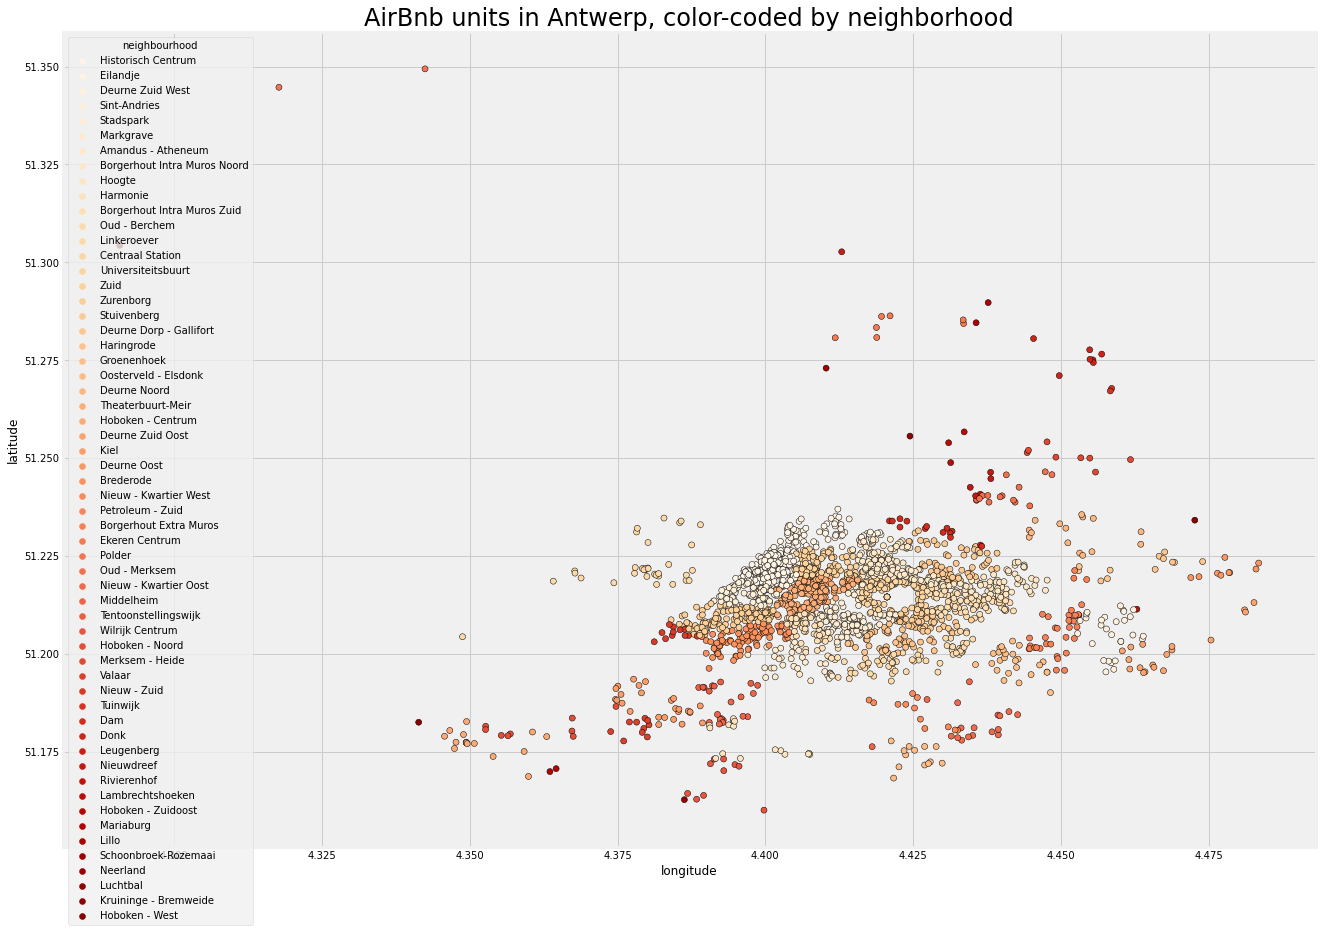

In [40]:
title = 'AirBnb units in Antwerp, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_antwerp_unique.longitude, master_df_antwerp_unique.latitude, hue = master_df_antwerp_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_antwerp.png')
plt.show()

## Add review data through a join

In [41]:
df_reviews = pd.concat([antwerp_raw_df_10_6_2021,raw_df_antwerp],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,50904,aplace/antwerp: cosy suite - fashion district,234077,Karin,NaN,Historisch Centrum,51.21825,4.39901,Hotel room,166,...,5.00,5.00,5.00,5.00,5.00,5.00,f,2,0,0
1,116134,Spacious apartment nearby Mas,586942,Paul,NaN,Eilandje,51.23051,4.40593,Entire home/apt,150,...,4.95,4.99,4.92,4.92,4.89,4.76,f,1,0,0
2,218916,Apartment with terrace in trendy Zurenborg,915664,Laura,NaN,Zurenborg,51.20633,4.42942,Entire home/apt,85,...,4.58,4.38,4.83,4.88,4.79,4.50,t,1,0,0
3,224333,Large stylish room in 1930s house + garden,1167377,Geert,NaN,Deurne Zuid West,51.19772,4.45853,Private room,16,...,4.50,2.00,4.50,3.50,4.50,4.50,f,0,2,0
4,224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,1263933,Kristien,NaN,Sint-Andries,51.21722,4.39790,Entire home/apt,75,...,4.80,4.83,4.89,4.89,4.96,4.73,f,1,0,0
5,345959,Marleen's home in Antwerp city,1754396,Marleen,NaN,Markgrave,51.19935,4.40154,Entire home/apt,50,...,4.81,4.85,4.85,4.86,4.43,4.79,f,2,0,0
6,363155,1-bedroom apartment with court yard,1835458,Roos,NaN,Amandus - Atheneum,51.22119,4.41951,Entire home/apt,68,...,4.95,4.91,5.00,5.00,4.64,4.82,f,1,0,0
7,522693,Ahome Awayfromhome,2562294,Ahome,NaN,Historisch Centrum,51.22001,4.39813,Entire home/apt,282,...,NaN,NaN,NaN,NaN,NaN,NaN,t,1,0,0
8,603545,*Perfect* for a Longer Stay | Trendy | City center,2987880,Serge,NaN,Harmonie,51.20753,4.40589,Entire home/apt,250,...,4.87,4.79,4.96,4.88,4.92,4.67,f,1,0,0
9,636664,"sunny rooftop apartment, sleeps 2-5",462975,Els,NaN,Borgerhout Intra Muros Zuid,51.21618,4.43037,Entire home/apt,100,...,4.65,4.48,4.80,4.82,4.24,4.33,f,1,0,0


## Regression

In [42]:
#df_reviews_.columns

In [43]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [44]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -46.23041378126777
Coefficients:  [  4.61136569  52.61134939  -5.06877847   0.66388221   6.603543
 -20.59373816  49.44169549 -12.37477308 -13.44644584]
LinearRegression()


In [45]:
y_pred2 = regr.predict(X_)

In [46]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')
df_result.head()

,Actual,Predicted,Diff
1657,395,112.245476,-282.754524
1654,360,112.245476,-247.754524
564,350,106.970228,-243.029772
1243,300,89.133190,-210.866810
272,175,-35.079921,-210.079921


<function matplotlib.pyplot.ylim(*args, **kwargs)>

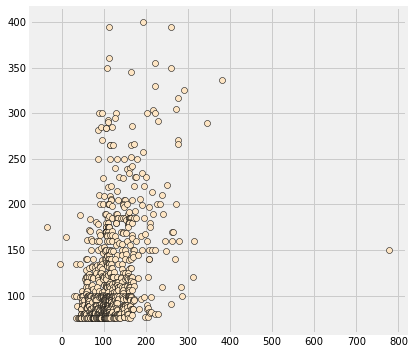

In [49]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(6,6))
plt.scatter(x,y, edgecolor='black')
plt.ylim